# Add a map to your website

Get started with maps

Nate Quarderer  
Elsa Culler  
2024-03-28

## Get started with map-making using open-sources tools

### Finding locations and boundaries

[Open Street Map (OSM)](https://www.openstreetmap.org/) is an
open-source, editable map of the world – a little like a wiki for
places. They also provide a service for looking up locations using text,
which we’ll be using in this activity.

### Mapping libraries

You’ll need to start by importing the following libraries:

In [1]:
# Work with vector data
import geopandas as gpd

# Save maps and plots to files
import holoviews as hv
# Create interactive maps and plots
import hvplot.pandas

# Search for locations by name - this might take a moment
from osmnx import features as osm

### Search for a point of interest

You can use the `pyrosm` package to download and search for spatial
vector data in your area, or anywhere around the world.

In this case, we’re looking for the location of the United Tribes
Technical College campus in North Dakota. The address in here,
`'United Tribes Technical College, Bismarck, ND, United States'`, does
not have to be complete or exact, but it should be specific enough to
narrow it down. We are also specifying that we want it to be tagges as a
`'amentity'` type, specifically a `'college'` You might have to try a
couple different searches with different addresses and/or tags to get
the address you want, just like if you are using a map website or app.

In [3]:
# Search for United Tribes Technical College
uttc_gdf = osm.features_from_address(
    'United Tribes Technical College, Bismarck, ND, United States',
    {'amenity': ['college']})
uttc_gdf

,,nodes,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,amenity,name,website,wikidata,geometry
element_type,osmid,,,,,,,,,,,
way,1157021269,"[10759584855, 10759584856, 10759584857, 450404...",Bismarck,3315,58504,ND,University Drive,college,United Tribes Technical College,https://uttc.edu/,Q7893617,"POLYGON ((-100.76305 46.76853, -100.76302 46.7..."


<Axes: >

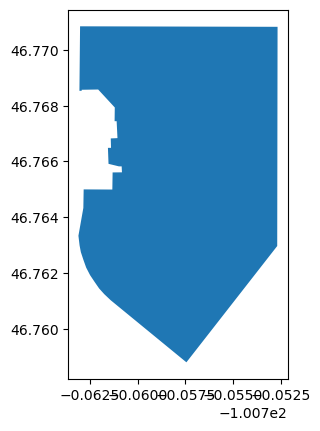

In [4]:
uttc_gdf.plot()

We have a map of the UTTC Campus!

> **Warning**
>
> The Open Street Maps (OSM) database is not always complete. For
> example, try searching for UTTC with the `{'building': True}`, and
> compare it to the [map of the UTTC campus on their
> website](https://uttc.edu/wp-content/uploads/2022/12/CAMPUS-MAP-2022-23.pdf).
> What do you notice?

### Create an interactive map

There are lots of different ways to create maps and plots in Python.
Here, we’re going to use a tool called `'hvplot'` and `'geoviews'` to
create an interactive map, including the online `'EsriImagery'` tile
source basemap.

In [5]:
# Plot UTTC boundary
uttc_map = uttc_gdf.reset_index().hvplot(
    # Givethe map a descriptive title
    title="United Tribes Technical College, Bismarck, ND",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=5,
    # Change the image size
    frame_width=400, frame_height=400)

# Save the map as a file to put on the web
hv.save(uttc_map, 'uttc.html')

# Display the map
uttc_map

/opt/conda/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

# Repeating workflow for Kirkwood Community College (Cedar Rapids, IA)

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt

# Define the city name and state
city = 'Cedar Rapids'
state = 'Iowa'

# Fetch the boundary polygon of the city
place_name = f'{city}, {state}, USA'
tags = {'place': 'city', 'name': city}
cr_gdf = ox.geometries_from_place(place_name, tags)
cr_gdf

/tmp/ipykernel_20564/883262183.py:11: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  cr_gdf = ox.geometries_from_place(place_name, tags)


ele gnis:feature_id          name place population  \
element_type osmid                                                           
node         151626808  247          465941  Cedar Rapids  city     137710   
relation     128355     NaN         2394368      Hiawatha  city        NaN   
             129078     NaN         2396389        Robins  city        NaN   
             129088     NaN          467567  Cedar Rapids  city        NaN   

                       population:date  wikidata              wikipedia  \
element_type osmid                                                        
node         151626808            2022   Q486439  en:Cedar Rapids, Iowa   
relation     128355                NaN  Q1922650      en:Hiawatha, Iowa   
             129078                NaN  Q1926058        en:Robins, Iowa   
             129088                NaN   Q486439  en:Cedar Rapids, Iowa   

                                                                 geometry  \
element_type osmid                                                          
node         151626808                         POINT (-91.67041 41.97589)   
relation     128355     POLYGON ((-91.67082 42.06598, -91.67083 42.065...   
             129078     MULTIPOLYGON (((-91.70149 42.10099, -91.69697 ...   
             129088     MULTIPOLYGON (((-91.72643 41.98905, -91.72643 ...   

                             name:en  ... tiger:LSAD tiger:MTFCC  \
element_type osmid                    ...                          
node         151626808  Cedar Rapids  ...        NaN         NaN   
relation     128355              NaN  ...         25       G4110   
             129078              NaN  ...         25       G4110   
             129088              NaN  ...         25       G4110   

                          tiger:NAME     tiger:NAMELSAD tiger:PCICBSA  \
element_type osmid                                                      
node         151626808           NaN                NaN           NaN   
relation     128355         Hiawatha      Hiawatha city             N   
             129078           Robins        Robins city             N   
             129088     Cedar Rapids  Cedar Rapids city             Y   

                       tiger:PCINECTA tiger:PLACEFP tiger:PLCIDFP  \
element_type osmid                                                  
node         151626808            NaN           NaN           NaN   
relation     128355                 N         35940       1935940   
             129078                 N         67800       1967800   
             129088                 N         12000       1912000   

                       tiger:STATEFP      type  
element_type osmid                              
node         151626808           NaN       NaN  
relation     128355               19  boundary  
             129078               19  boundary  
             129088               19  boundary  

[4 rows x 33 columns]

In [3]:
# Select out just the CR entries from this data
cr = cr_gdf[cr_gdf['name']=='Cedar Rapids']
cr

# Select out just the CR polygon
cr_poly = cr[cr['type']=='boundary']
cr_poly

,,ele,gnis:feature_id,name,place,population,population:date,wikidata,wikipedia,geometry,name:en,...,tiger:LSAD,tiger:MTFCC,tiger:NAME,tiger:NAMELSAD,tiger:PCICBSA,tiger:PCINECTA,tiger:PLACEFP,tiger:PLCIDFP,tiger:STATEFP,type
element_type,osmid,,,,,,,,,,,,,,,,,,,,,
relation,129088,NaN,467567,Cedar Rapids,city,NaN,NaN,Q486439,"en:Cedar Rapids, Iowa","MULTIPOLYGON (((-91.72643 41.98905, -91.72643 ...",NaN,...,25,G4110,Cedar Rapids,Cedar Rapids city,Y,N,12000,1912000,19,boundary


In [4]:
# Search for United Tribes Technical College
kirkwood_cc_gdf = osm.features_from_address(
    'Kirkwood Community College, Cedar Rapids, IA, United States',
    {'amenity': ['college']})
type(kirkwood_cc_gdf)

geopandas.geodataframe.GeoDataFrame

In [10]:
# Plot gdf using .explore()
kirkwood_cc_gdf.explore()

In [7]:
# Plot gdf using .explore()
cr_gdf.explore()

In [5]:
# Plot Kirkwood CC boundary
kirkwood_cc_map = kirkwood_cc_gdf.hvplot(
    # Givethe map a descriptive title
    title="Kirkwood Community College, Cedar Rapids, IA",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=5,
    # Change the image size
    frame_width=400, frame_height=400)

# Save the map as a file to put on the web
hv.save(kirkwood_cc_map, 'kirkwood_cc.html')

# Display the map
kirkwood_cc_map

/opt/conda/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

In [7]:
# Plot CR IA boundary
cr_map = cr_poly.hvplot(
    # Givethe map a descriptive title
    title="Cedar Rapids, IA and Kirkwood CC",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=5,
    # Change the image size
    frame_width=400, frame_height=400) * \
    kirkwood_cc_gdf.hvplot(
    # Givethe map a descriptive title
    title="Cedar Rapids, IA and Kirkwood CC",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='red', line_width=5,
    # Change the image size
    frame_width=400, frame_height=400)

# Save the map as a file to put on the web
hv.save(cr_map, 'cr.html')

# Display the map
cr_map

:Overlay
   .WMTS.I      :WMTS   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]
   .WMTS.II     :WMTS   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]